In [1]:
"""
This code corresponds to Listing 1.
Created on: 2025-09-06
Author: Dr. Richard Magala

Description:
------------
Demonstrates the basic usage of apsimNGpy by instantiating
an APSIM Next Generation model object and accessing its path.
"""

from apsimNGpy.core.apsim import ApsimModel
from pathlib import Path
from config import logger, BASE_DIR
wd = BASE_DIR / 'demo'
wd.mkdir(exist_ok=True)
if __name__ == '__main__':
    logger.info('Starting APSIM Next Generation')
    _out_path = wd / 'out_maize_1111.apsimx'
    # Create a model instance (using "Maize" as an example)
    model = ApsimModel("Maize", out_path=_out_path)
    # change the planting density
    # first inspect the manager script that is implementing population density
    sow_params = model.inspect_model_parameters(model_type='Models.Manager', model_name='Sow using a variable rule')
    # output
    # {'Crop': 'Maize',
    #  'StartDate': '1-nov',
    #  'EndDate': '10-jan',
    #  'MinESW': '100.0',
    #  'MinRain': '25.0',
    #  'RainDays': '7',
    #  'CultivarName': 'Dekalb_XL82',
    #  'SowingDepth': '30.0',
    #  'RowSpacing': '750.0',
    #  'Population': '12'}

    model.edit_model(model_type='Models.Manager', model_name='Sow using a variable rule', Population=12)
    # download and replace weather data automatically
    lonlat = (-93.44, 41.1234)
    model.get_weather_from_web(lonlat=lonlat, start=1981, end=2022)
    # change the start and end dates
    model.edit_model(model_type='Models.Clock', model_name='Clock', start='1990-01-01', end='2021-12-31')
    # run the model
    # you may need to check the available report names
    report_tables = model.inspect_model('Models.Report', fullpath=False)
    # output: ['Report']
    model.run(report_name="Report")
    # retrieve results
    df = model.results
    # same as
    dfs = model.get_simulated_output(report_names='Report')
    mn =dfs.mean(numeric_only=True)
    logger.info(f"mean summary of the data:\n {mn}")
    # save edited file
    filename = str((wd / 'my-edited-maize-model.apsimx').resolve())
    # save simulated data
    csv_file_name= str((wd / 'simulated'))
    df.to_csv(csv_file_name)
    logger.info(f"simulated data saved to: {csv_file_name}")
    model.save(file_name=filename)
    logger.info(f'Saved edited model to {filename}\n')
    logger.info(f"see simulated results below:\n{df}")
    logger.info(f"successfully executed listing code 1")


10:25:37 | INFO | setting APSIM bin path
10:25:37 | INFO | APSIM 2025.8.7844.0 successfully loaded to path
10:25:37 | INFO | Starting APSIM Next Generation
10:25:50 | INFO | mean summary of the data:
 SimulationID                     1.000000
CheckpointID                     1.000000
Maize.AboveGround.N             13.318783
Maize.AboveGround.Wt          1792.163000
Maize.Grain.N                    9.135739
Maize.Grain.NumberFunction    3749.269174
Maize.Grain.Size                 0.224478
Maize.Grain.Total.Wt           828.468957
Maize.Grain.Wt                 828.468957
Maize.Total.Wt                1883.205565
Yield                         8284.689391
dtype: float64
10:25:50 | INFO | simulated data saved to: D:\manuscript_code_apsimNGpy\reproducible\demo\simulated
10:25:50 | INFO | Saved edited model to D:\manuscript_code_apsimNGpy\reproducible\demo\my-edited-maize-model.apsimx

10:25:50 | INFO | see simulated results below:
   SimulationName  SimulationID  CheckpointID CheckpointNa

10:58:18 | INFO | Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
10:58:18 | INFO | Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


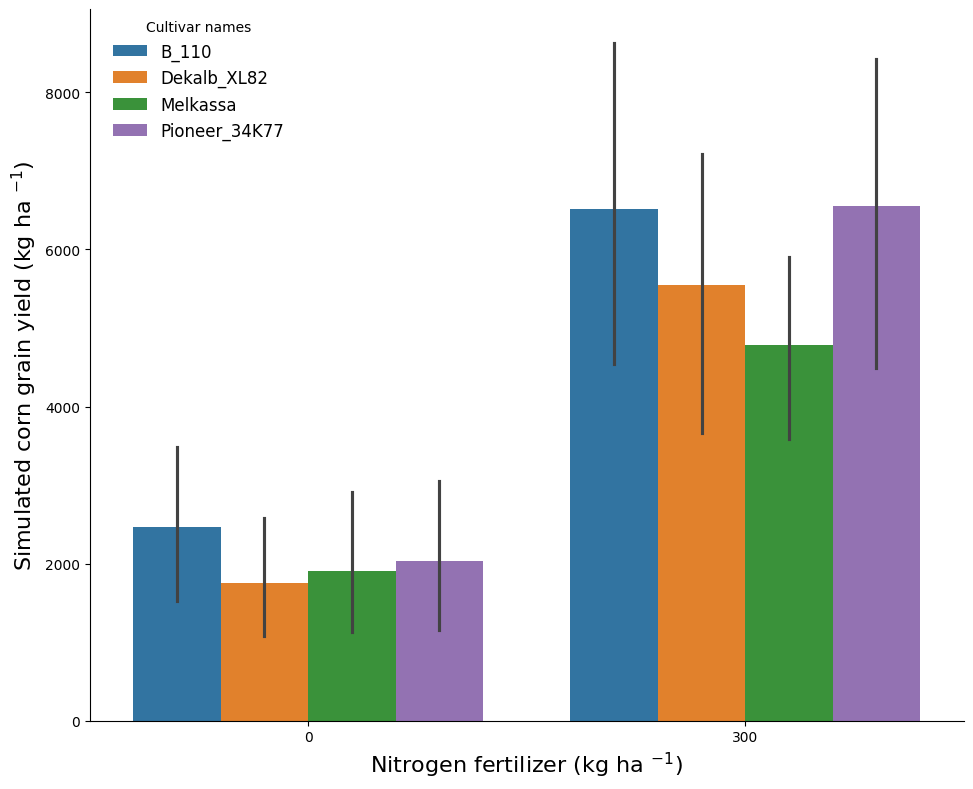

10:58:19 | INFO | succeeded


In [4]:
"""
This code runs listing 3
"""
from pathlib import Path
import os
from constants import custom_colors
from apsimNGpy.core.experimentmanager import ExperimentManager as Experiment
from config import logger, BASE_DIR

if __name__ == '__main__':
    wd = BASE_DIR.parent / 'apsimx'
    wd.mkdir(exist_ok=True)
    os.chdir(wd)
    experiment = Experiment('Maize', out_path=(wd / 'out_maizer.apsimx').resolve())
    experiment.init_experiment()
    experiment.add_factor('[Fertilise at sowing].Script.Amount = 0, 300')
    experiment.add_factor(
        '[Sow using a variable rule].Script.CultivarName= Dekalb_XL82, Melkassa, B_110, Pioneer_34K77')
    # run the experiment
    experiment.run()
    df = experiment.results
    g = experiment.cat_plot(x='Amount', y='Yield', hue='CultivarName', kind='bar', height=8, aspect=1,
                            palette=custom_colors)
    g._legend.set_title('Cultivar names')
    g._legend.set_bbox_to_anchor((0.1, 0.98))
    g._legend.set_frame_on(False)
    g._legend.set_loc("upper left")
    experiment.render_plot(save_as=(wd / 'experiment.png').resolve(), dpi=600, show=True,
                           ylabel='Simulated corn grain yield (kg ha $^{-1}$)',
                           xlabel='Nitrogen fertilizer (kg ha $^{-1}$)')

    logger.info('succeeded')
   